# GAMA-15 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
04829ed (Thu Nov 2 16:57:19 2017 +0000) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_gama-15_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_gama-15_20171108.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

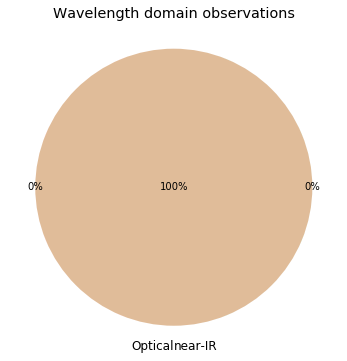

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

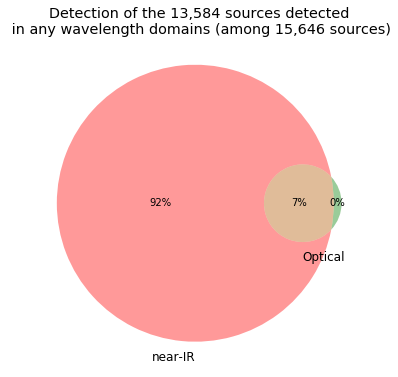

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = [           "KIDS u"]
g_bands = ["DECam g", "KIDS g", "SUPRIME g", "GPC1 g"]
r_bands = ["DECam r", "KIDS r", "SUPRIME r", "GPC1 r"]
i_bands = ["DECam i", "KIDS i", "SUPRIME i", "GPC1 i"]
z_bands = ["DECam z",           "SUPRIME z", "GPC1 z"]
y_bands = ["DECam y",           "SUPRIME y", "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

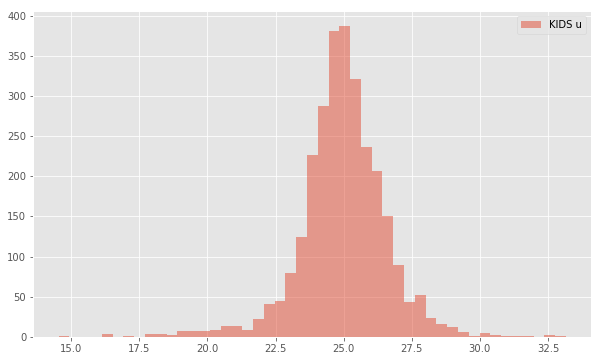

HELP warning: the column m_decam_g (DECam g) is empty.


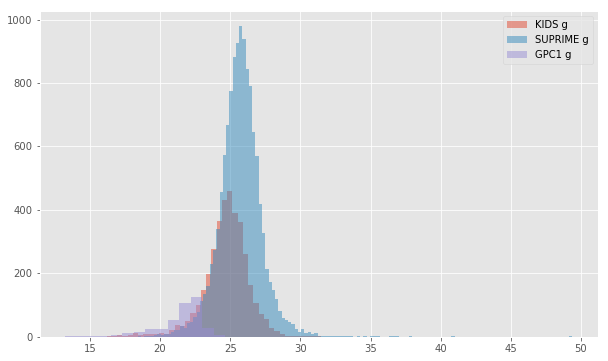

HELP warning: the column m_decam_r (DECam r) is empty.


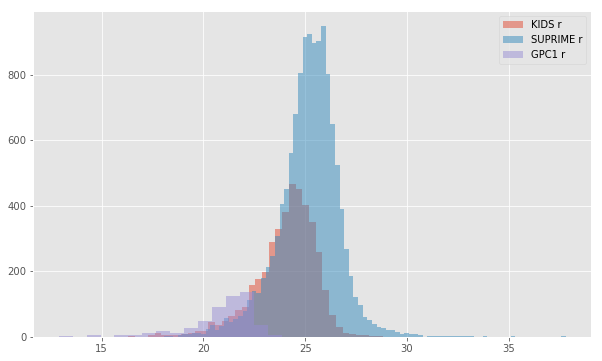

HELP warning: the column m_decam_i (DECam i) is empty.


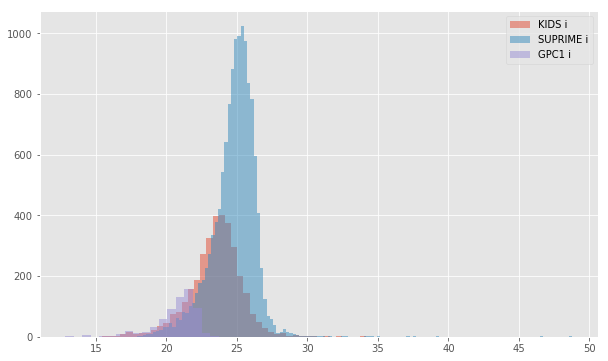

HELP warning: the column m_decam_z (DECam z) is empty.


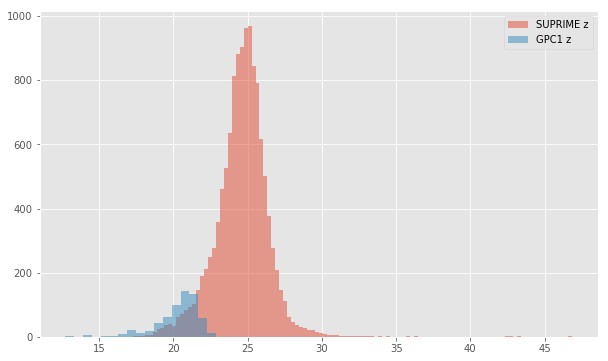

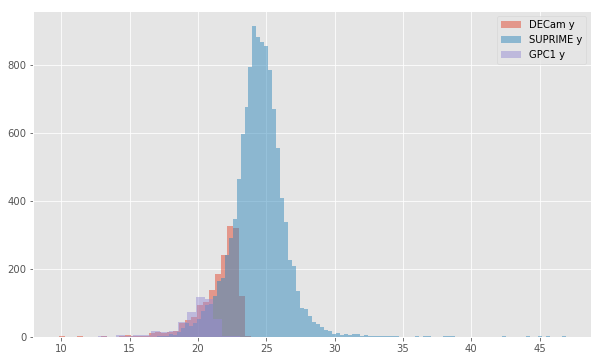

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

No sources have both DECam g (aperture) and KIDS g (aperture) values.
No sources have both DECam g (total) and KIDS g (total) values.
No sources have both DECam g (aperture) and SUPRIME g (aperture) values.
No sources have both DECam g (total) and SUPRIME g (total) values.
No sources have both DECam g (aperture) and GPC1 g (aperture) values.
No sources have both DECam g (total) and GPC1 g (total) values.
SUPRIME g (aperture) - KIDS g (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.17
- 1% percentile: -1.804203243255615
- 99% percentile: 0.9355066871643066


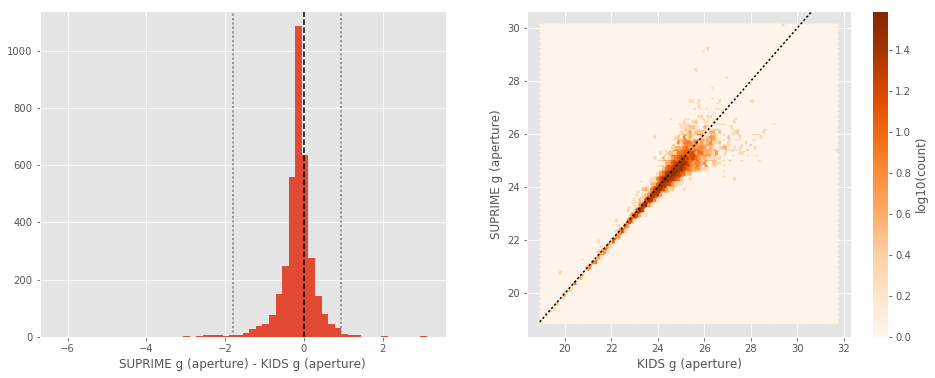

SUPRIME g (total) - KIDS g (total):
- Median: -0.33
- Median Absolute Deviation: 0.26
- 1% percentile: -2.727629165649414
- 99% percentile: 1.2197661590576194


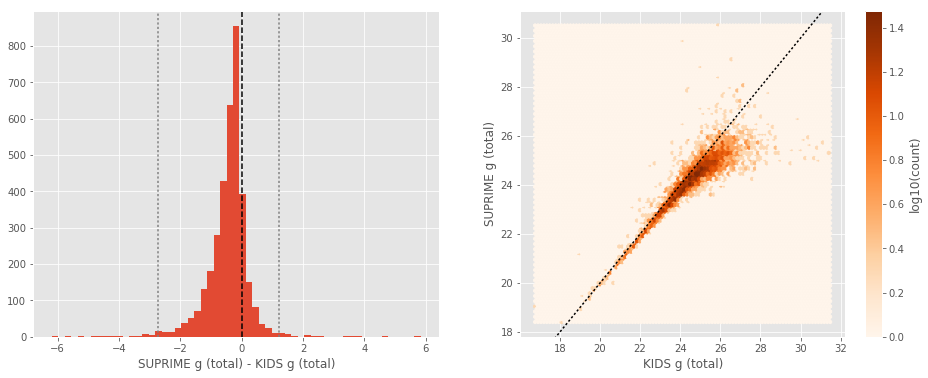

GPC1 g (aperture) - KIDS g (aperture):
- Median: -0.26
- Median Absolute Deviation: 0.37
- 1% percentile: -2.0977938270568846
- 99% percentile: 1.8962660789489716


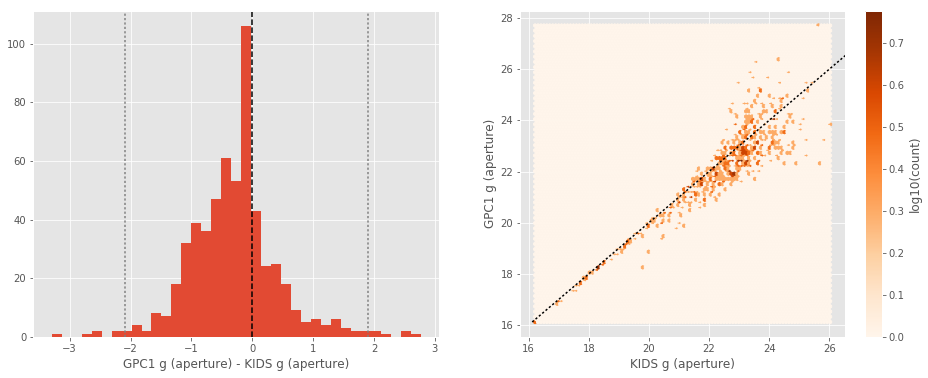

GPC1 g (total) - KIDS g (total):
- Median: -0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3550244140625
- 99% percentile: 0.8108255767822267


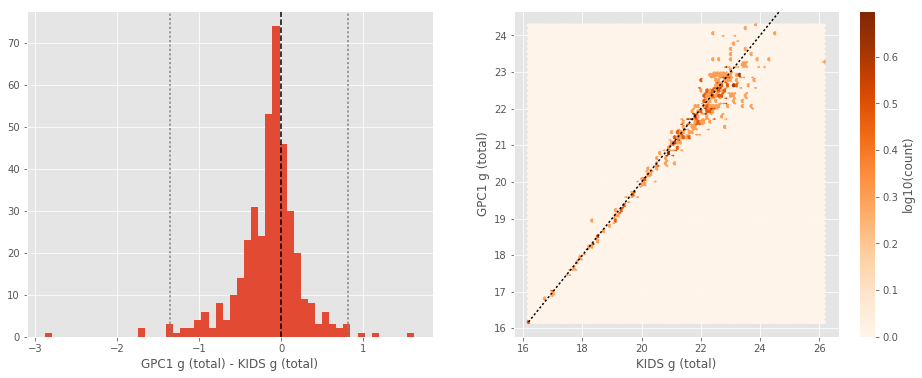

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.21
- Median Absolute Deviation: 0.40
- 1% percentile: -1.9547321319580078
- 99% percentile: 2.2105833053588775


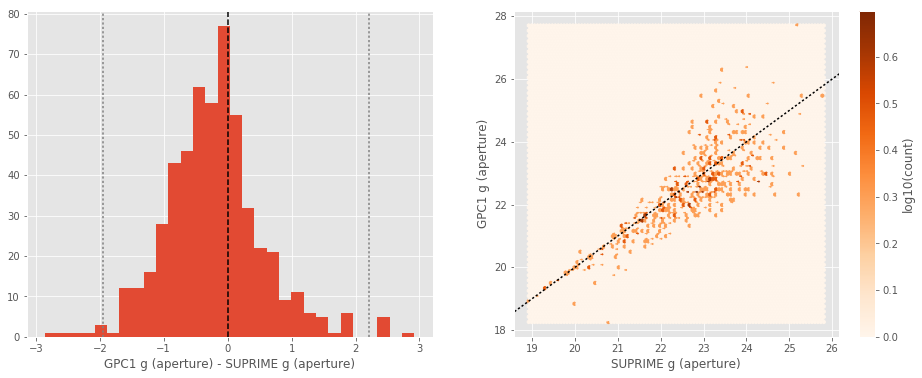

GPC1 g (total) - SUPRIME g (total):
- Median: 0.02
- Median Absolute Deviation: 0.19
- 1% percentile: -1.3794946670532227
- 99% percentile: 0.9656658172607422


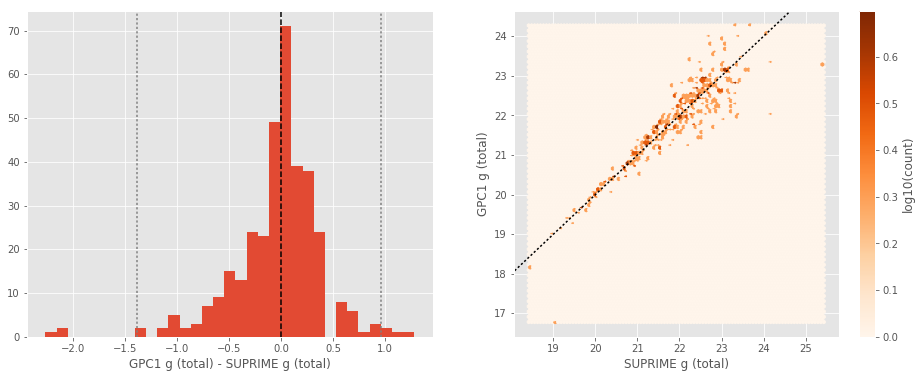

No sources have both DECam r (aperture) and KIDS r (aperture) values.
No sources have both DECam r (total) and KIDS r (total) values.
No sources have both DECam r (aperture) and SUPRIME r (aperture) values.
No sources have both DECam r (total) and SUPRIME r (total) values.
No sources have both DECam r (aperture) and GPC1 r (aperture) values.
No sources have both DECam r (total) and GPC1 r (total) values.
SUPRIME r (aperture) - KIDS r (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9384848022460939
- 99% percentile: 0.9721534729003934


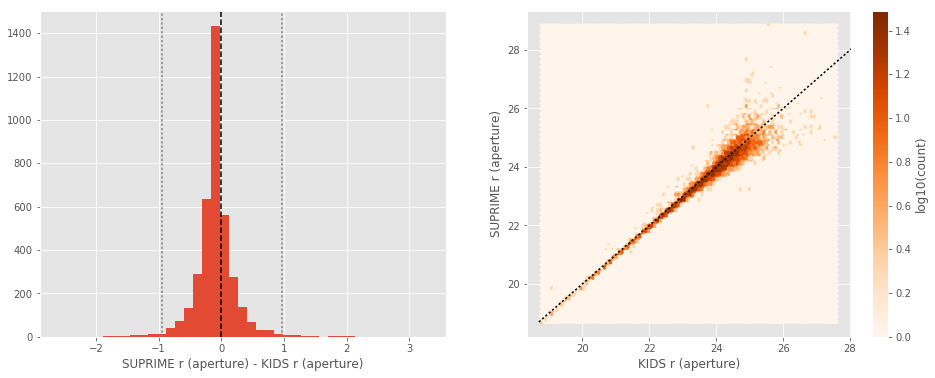

SUPRIME r (total) - KIDS r (total):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.3578424835205078
- 99% percentile: 1.025026702880859


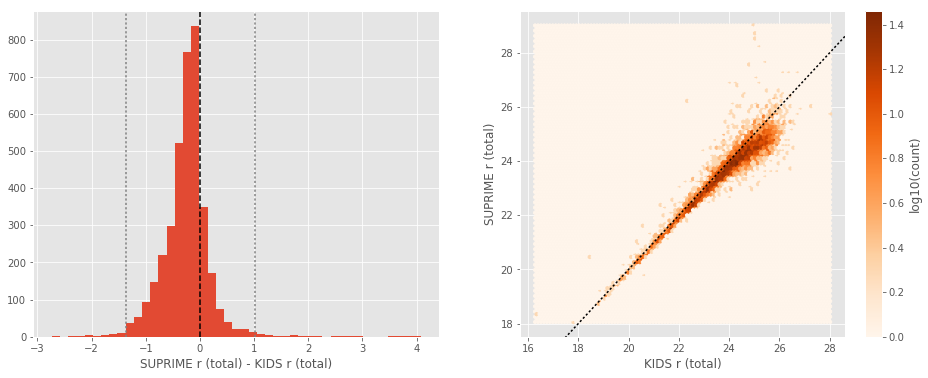

GPC1 r (aperture) - KIDS r (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.23
- 1% percentile: -1.3458893585205076
- 99% percentile: 1.6602247619628854


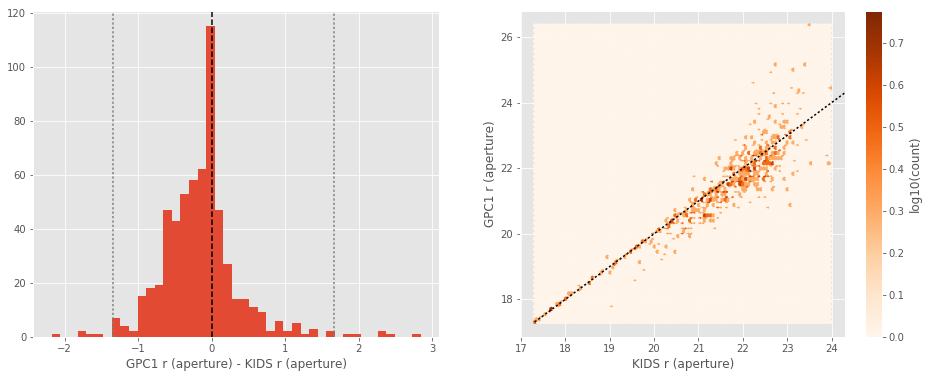

GPC1 r (total) - KIDS r (total):
- Median: 0.04
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1568322563171387
- 99% percentile: 0.7246530151367181


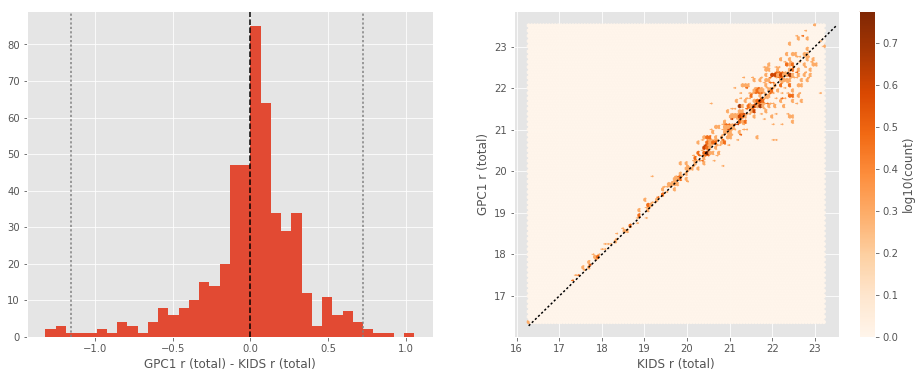

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.27
- 1% percentile: -1.6242513847351074
- 99% percentile: 1.7310259437561033


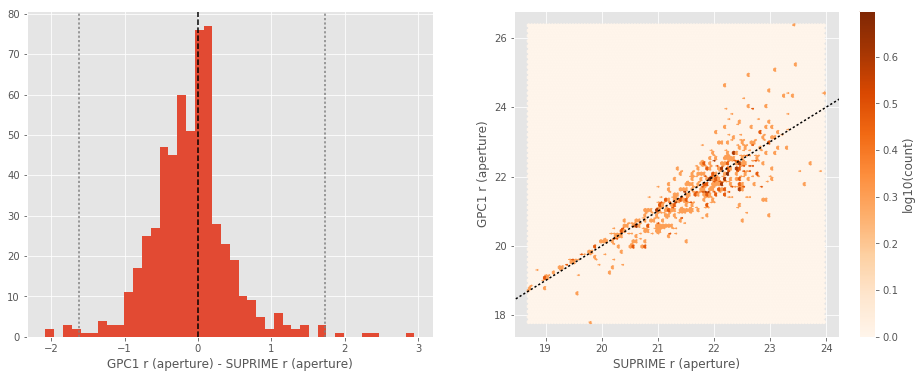

GPC1 r (total) - SUPRIME r (total):
- Median: 0.12
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0849033355712892
- 99% percentile: 0.8803732872009291


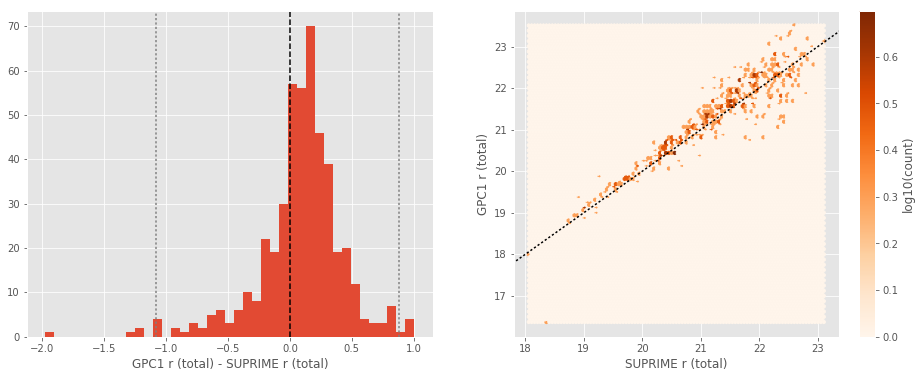

No sources have both DECam i (aperture) and KIDS i (aperture) values.
No sources have both DECam i (total) and KIDS i (total) values.
No sources have both DECam i (aperture) and SUPRIME i (aperture) values.
No sources have both DECam i (total) and SUPRIME i (total) values.
No sources have both DECam i (aperture) and GPC1 i (aperture) values.
No sources have both DECam i (total) and GPC1 i (total) values.
SUPRIME i (aperture) - KIDS i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.21
- 1% percentile: -2.3346391296386715
- 99% percentile: 1.2412415313720697


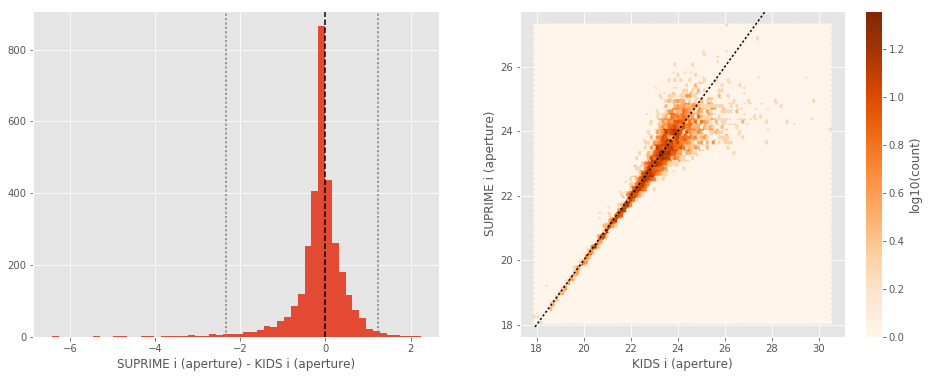

SUPRIME i (total) - KIDS i (total):
- Median: -0.34
- Median Absolute Deviation: 0.31
- 1% percentile: -3.425771369934082
- 99% percentile: 1.1140112113952627


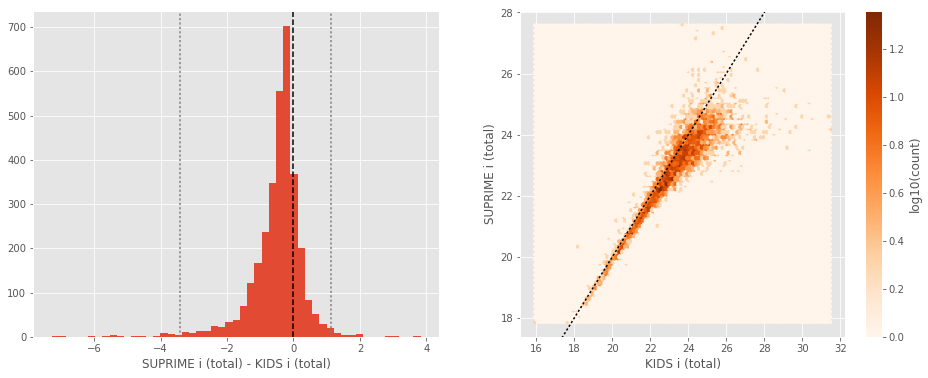

GPC1 i (aperture) - KIDS i (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.18
- 1% percentile: -0.9001494979858399
- 99% percentile: 0.7536213302612308


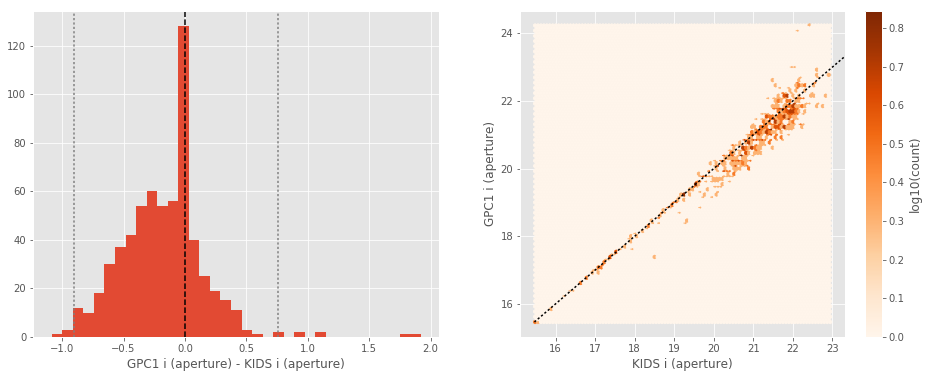

GPC1 i (total) - KIDS i (total):
- Median: -0.00
- Median Absolute Deviation: 0.12
- 1% percentile: -0.7743939971923829
- 99% percentile: 0.6032214355468748


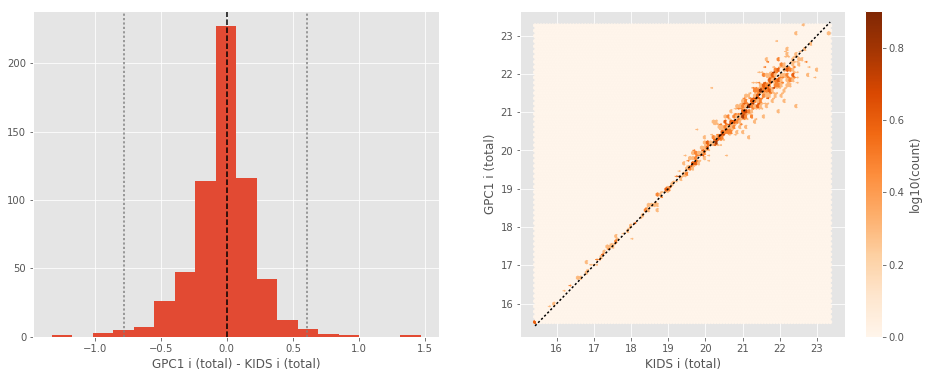

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0667251586914062
- 99% percentile: 0.7372714233398439


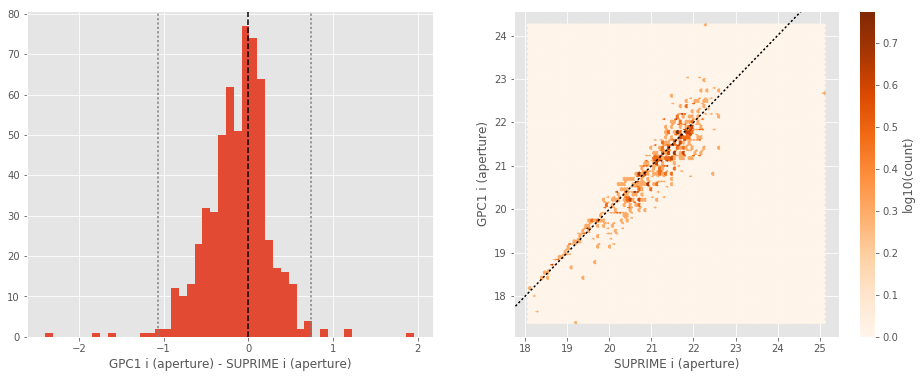

GPC1 i (total) - SUPRIME i (total):
- Median: 0.18
- Median Absolute Deviation: 0.12
- 1% percentile: -0.6429066085815429
- 99% percentile: 0.7811631393432605


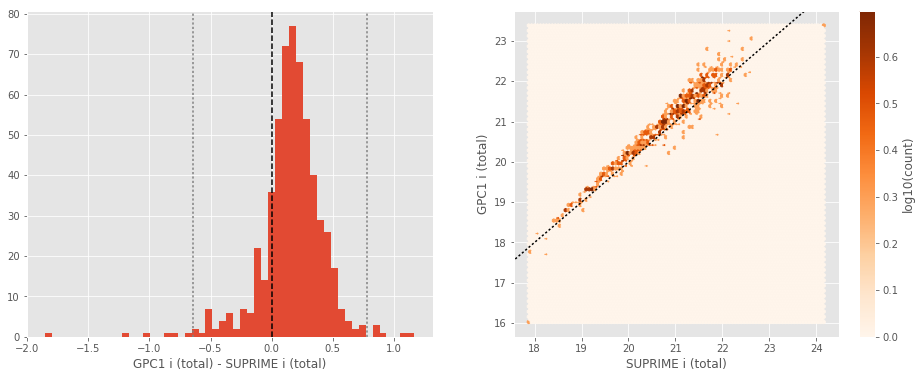

No sources have both DECam z (aperture) and SUPRIME z (aperture) values.
No sources have both DECam z (total) and SUPRIME z (total) values.
No sources have both DECam z (aperture) and GPC1 z (aperture) values.
No sources have both DECam z (total) and GPC1 z (total) values.
GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.22
- 1% percentile: -0.9701237869262695
- 99% percentile: 0.8385031509399413


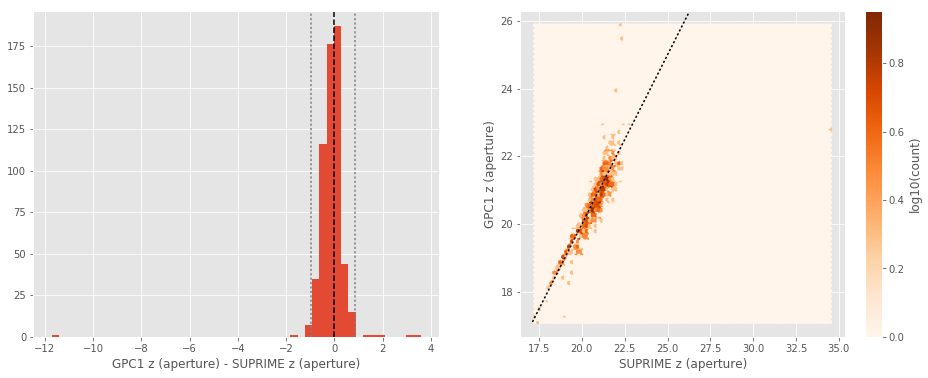

GPC1 z (total) - SUPRIME z (total):
- Median: 0.15
- Median Absolute Deviation: 0.14
- 1% percentile: -0.6275969314575195
- 99% percentile: 0.926331329345703


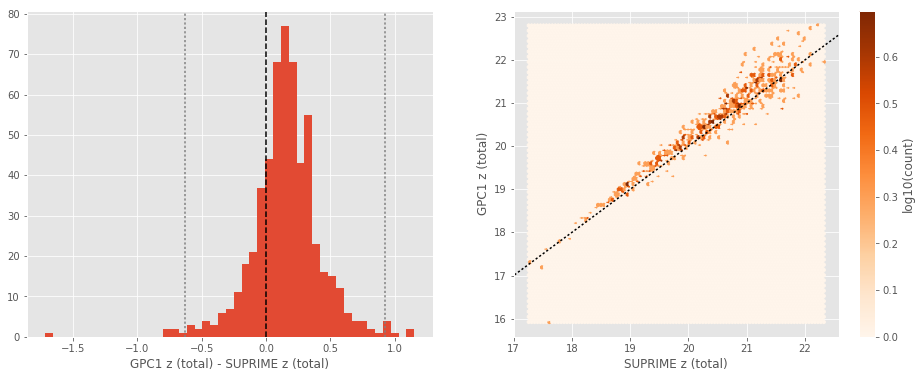

SUPRIME y (aperture) - DECam y (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.17
- 1% percentile: -1.0990952301025392
- 99% percentile: 0.9846000671386684


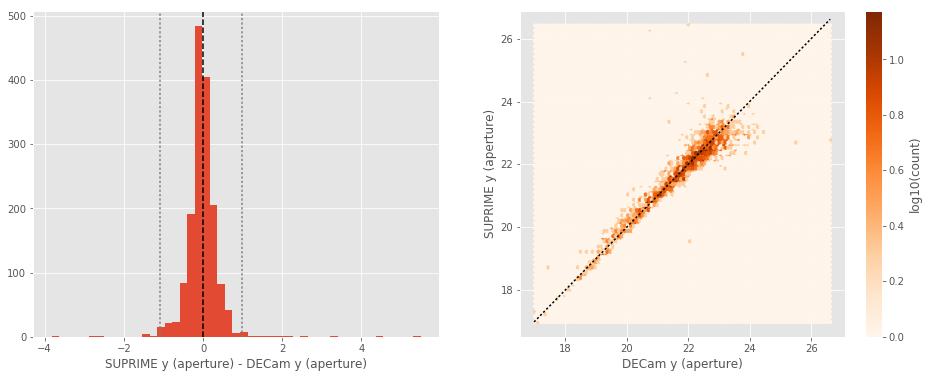

SUPRIME y (total) - DECam y (total):
- Median: -0.04
- Median Absolute Deviation: 0.14
- 1% percentile: -0.6748699378967284
- 99% percentile: 1.497819404602058


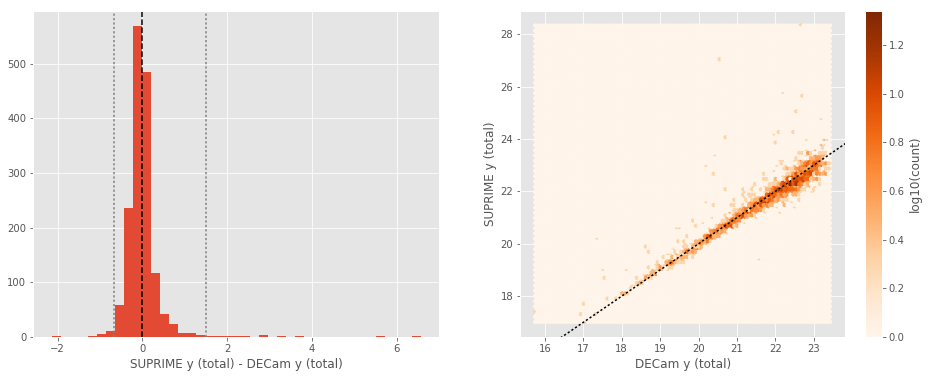

GPC1 y (aperture) - DECam y (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2585794448852539
- 99% percentile: 2.118834018707277


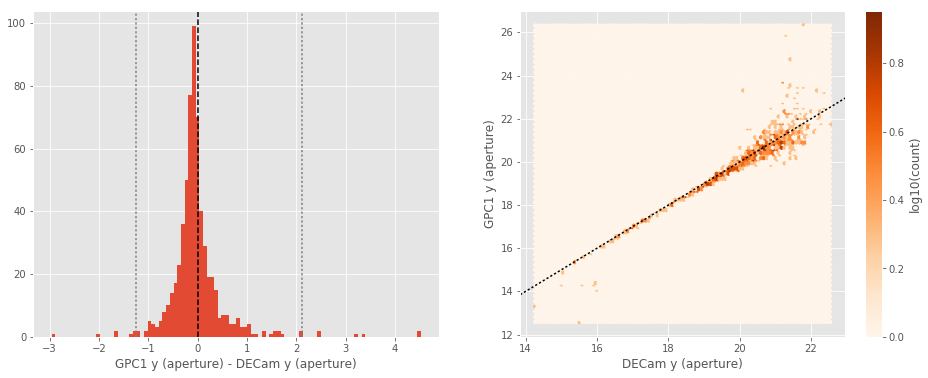

GPC1 y (total) - DECam y (total):
- Median: 0.14
- Median Absolute Deviation: 0.14
- 1% percentile: -0.802723503112793
- 99% percentile: 1.3460649681091275


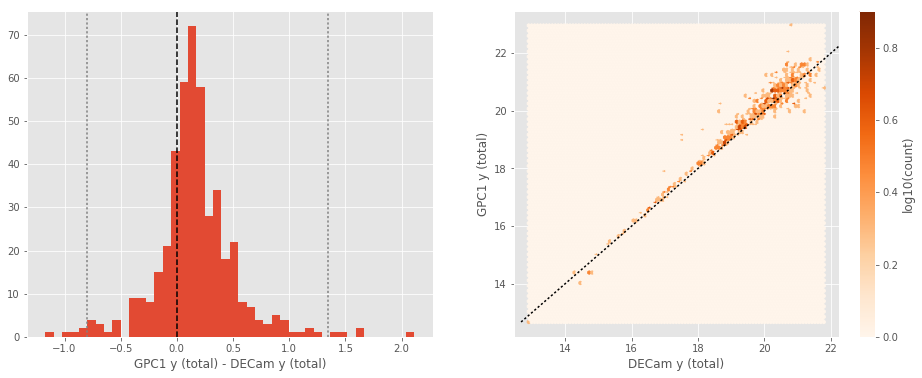

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.25
- 1% percentile: -1.2539484786987305
- 99% percentile: 2.0991809654235727


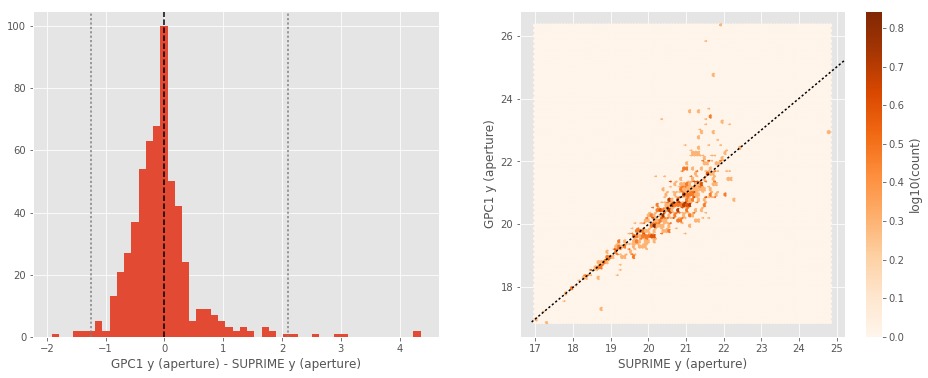

GPC1 y (total) - SUPRIME y (total):
- Median: 0.15
- Median Absolute Deviation: 0.17
- 1% percentile: -0.8851986694335938
- 99% percentile: 0.9944465446472169


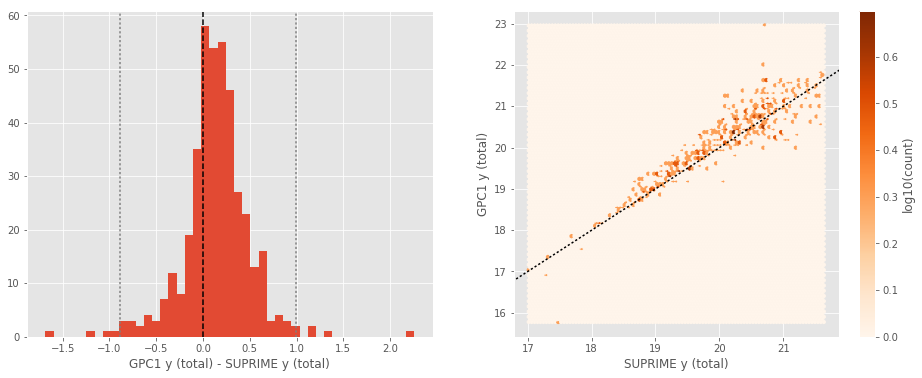

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [25]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-15.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

KIDS u (aperture) - SDSS u (fiberMag):
- Median: 0.13
- Median Absolute Deviation: 0.41
- 1% percentile: -1.3491605377197267
- 99% percentile: 3.5742466354370057


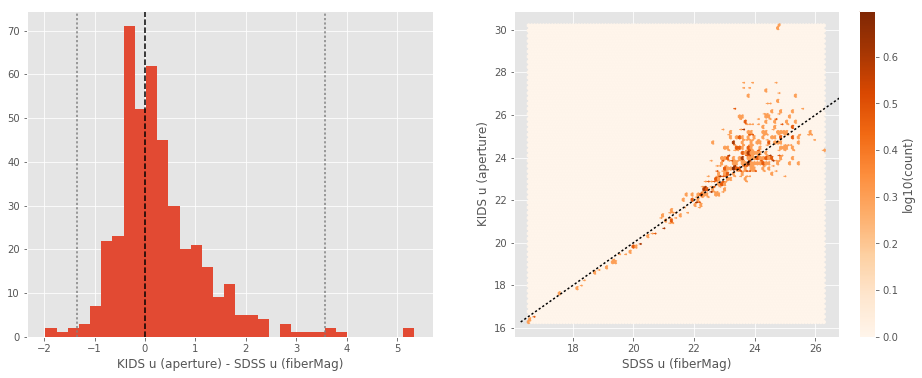

KIDS u (total) - SDSS u (petroMag):
- Median: 0.13
- Median Absolute Deviation: 0.41
- 1% percentile: -1.3491605377197267
- 99% percentile: 3.5742466354370057


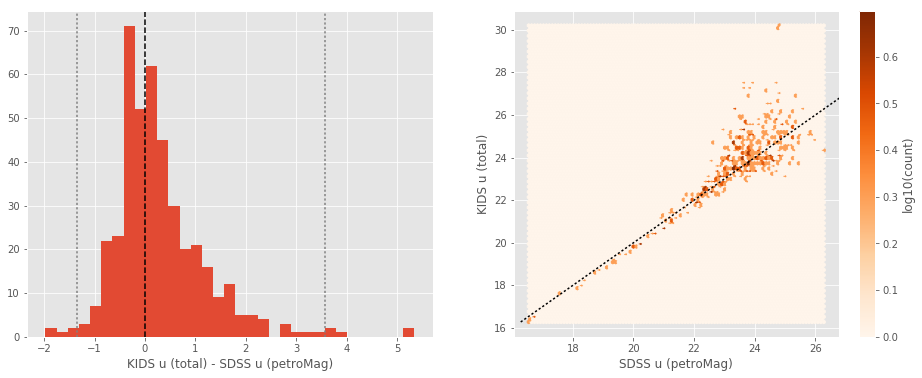

No sources have both SDSS g (fiberMag) and DECam g (aperture) values.
No sources have both SDSS g (petroMag) and DECam g (total) values.
KIDS g (aperture) - SDSS g (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.15
- 1% percentile: -0.9553550148010255
- 99% percentile: 0.8714827919006335


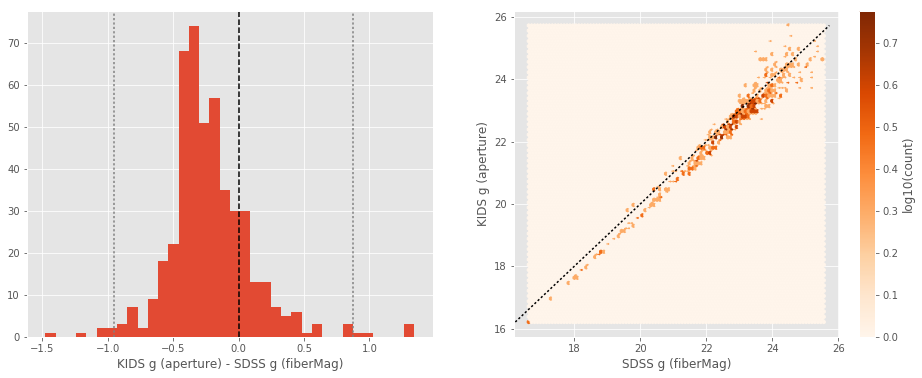

KIDS g (total) - SDSS g (petroMag):
- Median: -0.26
- Median Absolute Deviation: 0.15
- 1% percentile: -0.9553550148010255
- 99% percentile: 0.8714827919006335


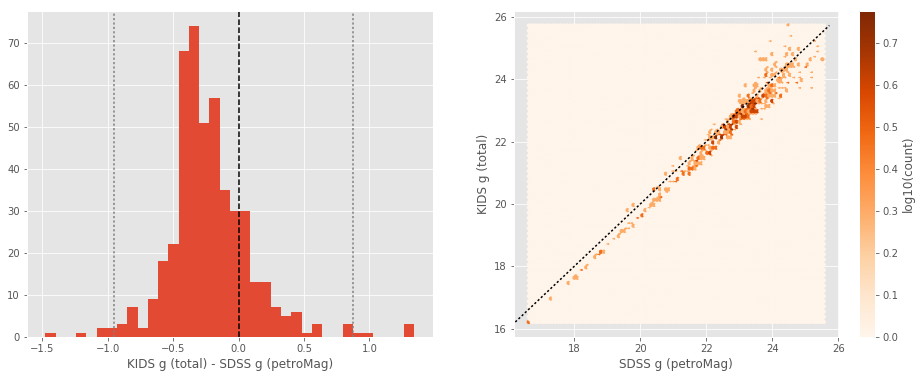

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.17
- 1% percentile: -1.052355155944824
- 99% percentile: 0.6129196548461905


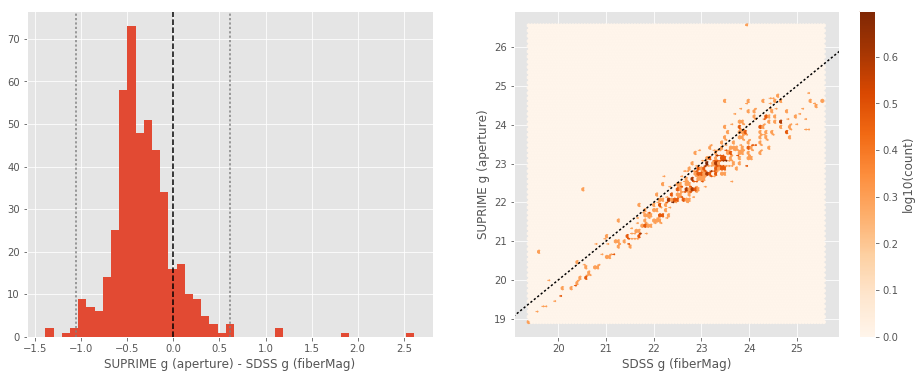

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.37
- Median Absolute Deviation: 0.17
- 1% percentile: -1.052355155944824
- 99% percentile: 0.6129196548461905


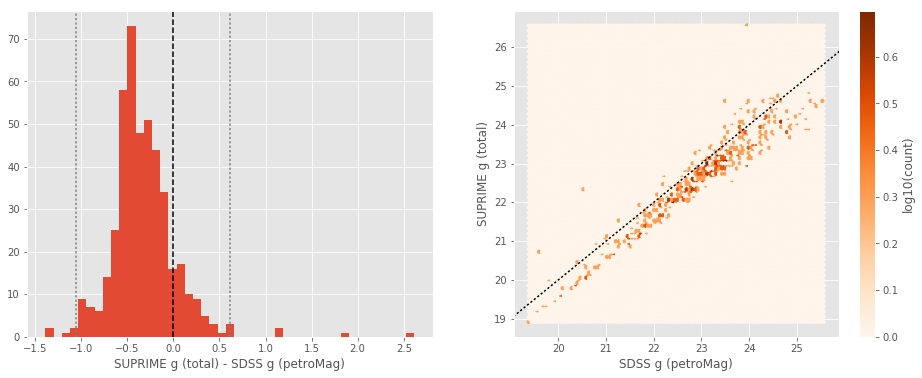

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.52
- Median Absolute Deviation: 0.31
- 1% percentile: -2.053647994995117
- 99% percentile: 1.3181113433837892


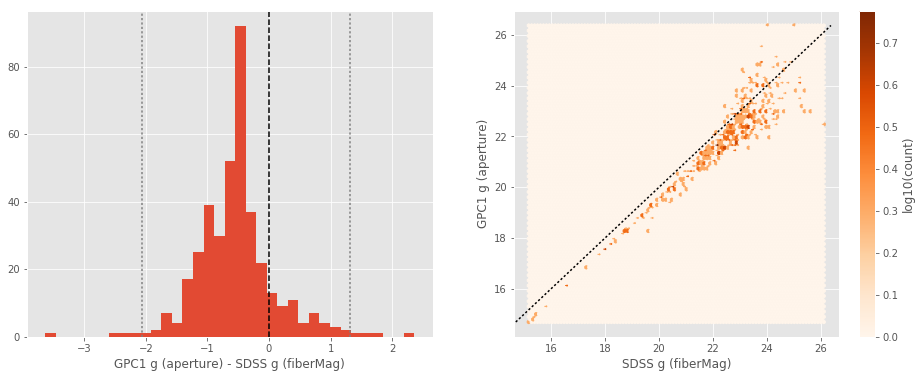

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.52
- Median Absolute Deviation: 0.31
- 1% percentile: -2.053647994995117
- 99% percentile: 1.3181113433837892


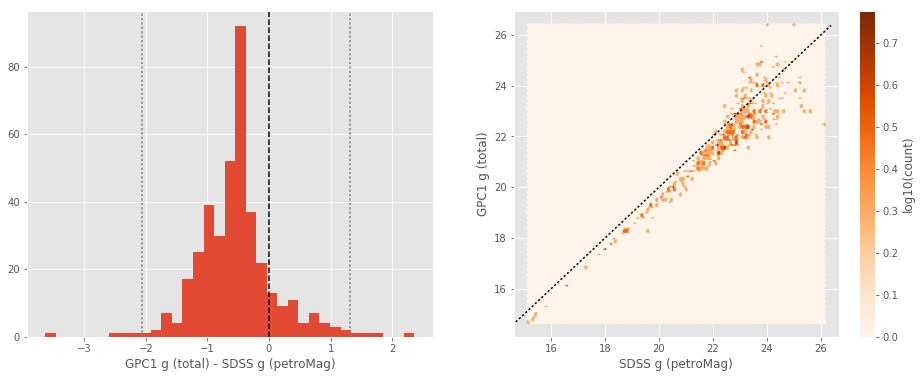

No sources have both SDSS r (fiberMag) and DECam r (aperture) values.
No sources have both SDSS r (petroMag) and DECam r (total) values.
KIDS r (aperture) - SDSS r (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.10
- 1% percentile: -0.7596443176269532
- 99% percentile: 0.18850250244140604


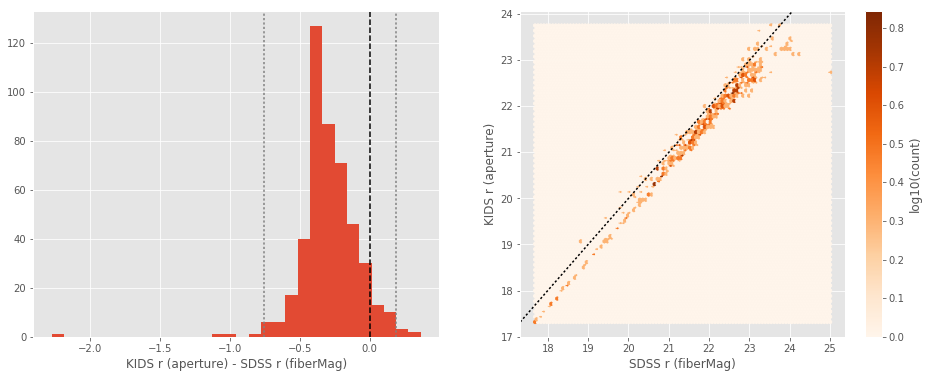

KIDS r (total) - SDSS r (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.10
- 1% percentile: -0.7596443176269532
- 99% percentile: 0.18850250244140604


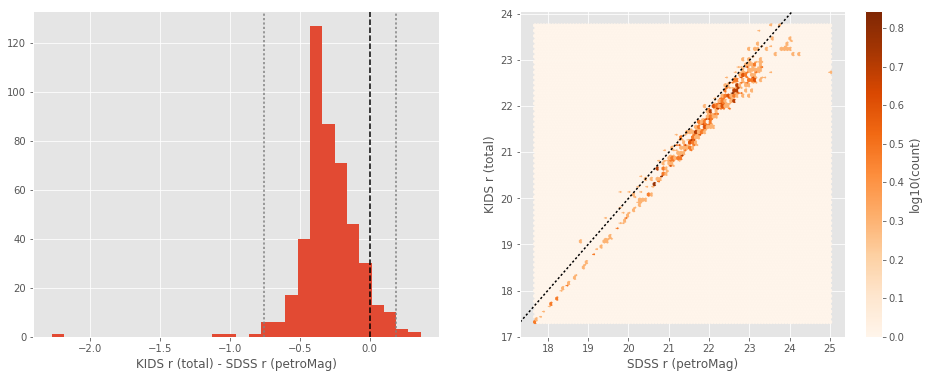

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8093953704833985
- 99% percentile: 0.2968302917480453


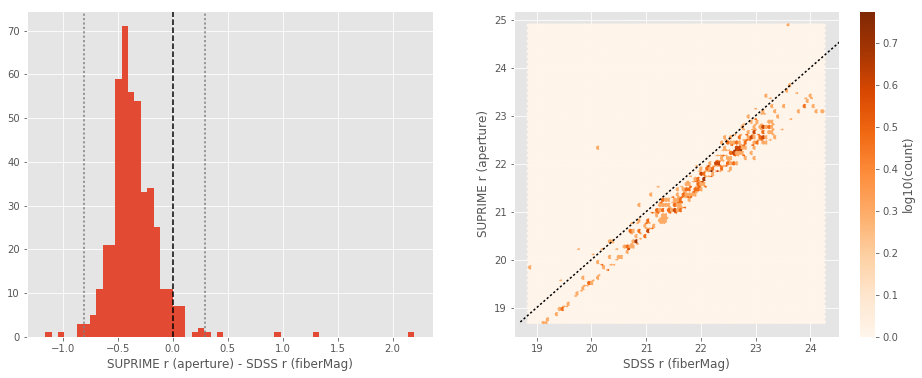

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.38
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8093953704833985
- 99% percentile: 0.2968302917480453


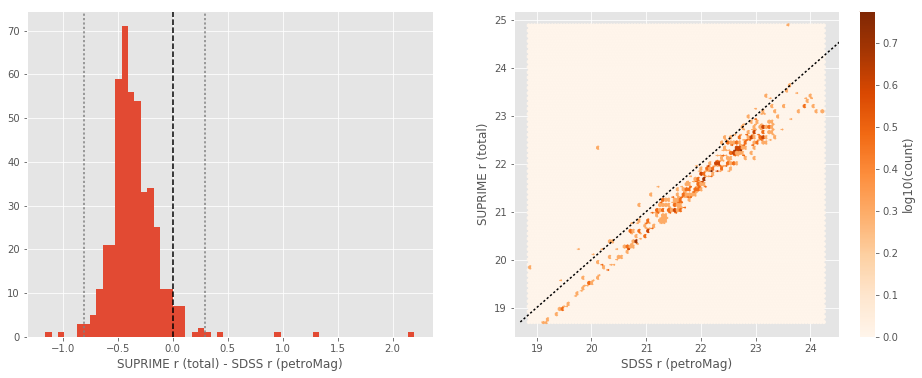

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3227413177490235
- 99% percentile: 1.0178560638427738


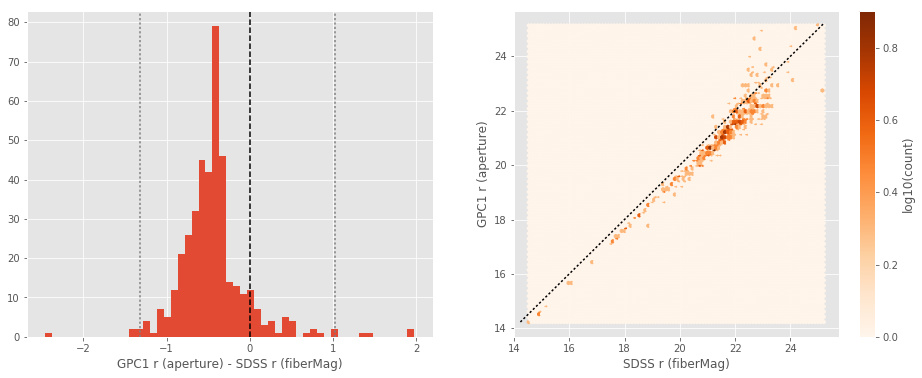

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.45
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3227413177490235
- 99% percentile: 1.0178560638427738


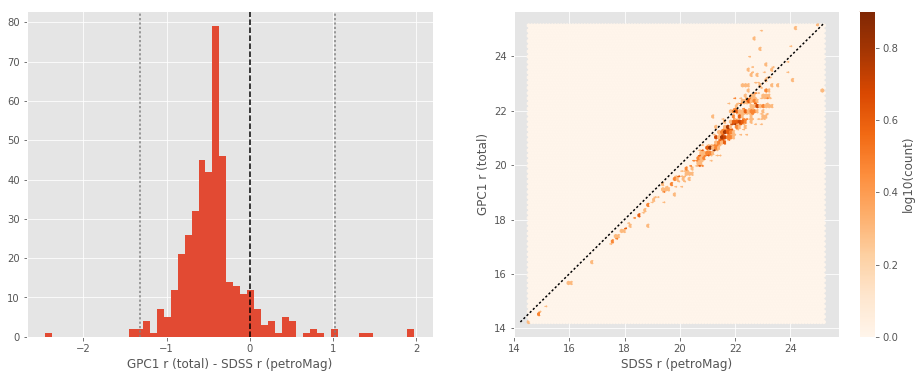

No sources have both SDSS i (fiberMag) and DECam i (aperture) values.
No sources have both SDSS i (petroMag) and DECam i (total) values.
KIDS i (aperture) - SDSS i (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9768302917480469
- 99% percentile: 0.30551078796386677


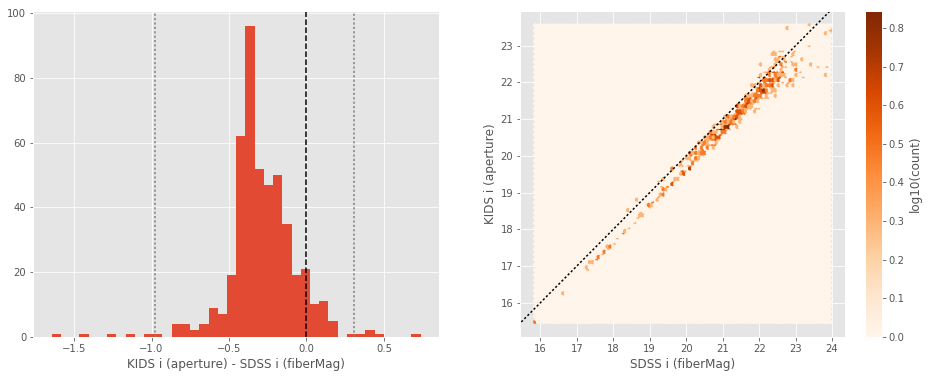

KIDS i (total) - SDSS i (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9768302917480469
- 99% percentile: 0.30551078796386677


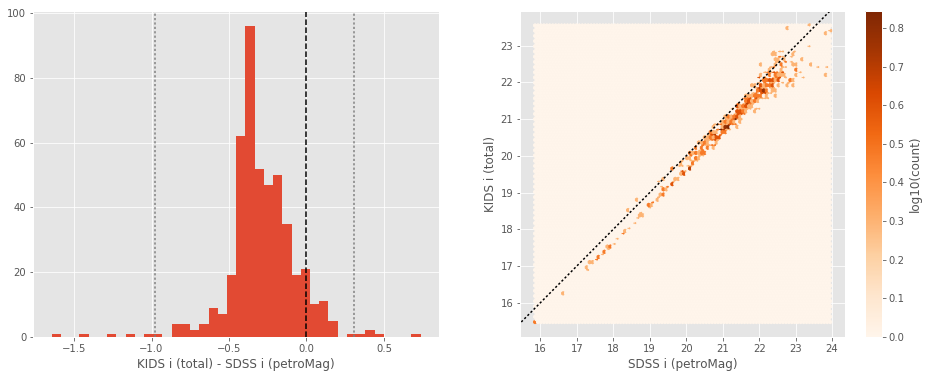

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.39
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0032370567321778
- 99% percentile: 0.41453981399536


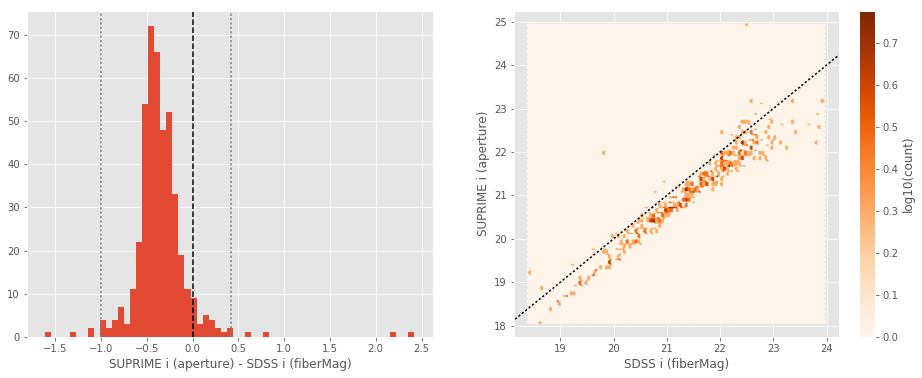

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.39
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0032370567321778
- 99% percentile: 0.41453981399536


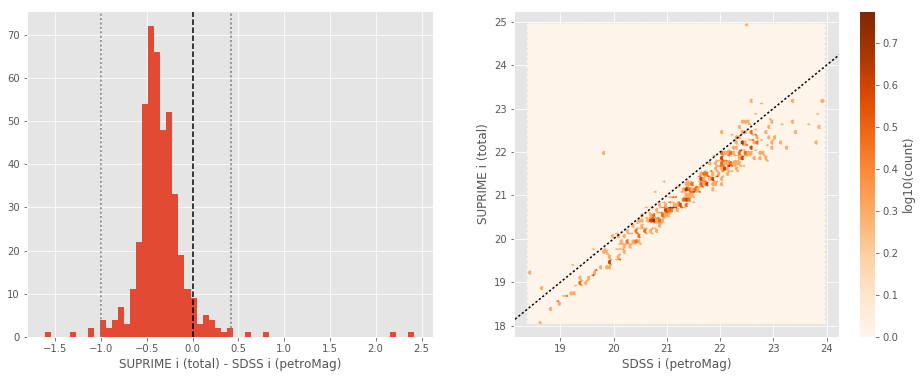

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.46
- Median Absolute Deviation: 0.13
- 1% percentile: -1.05235595703125
- 99% percentile: 0.22046985626220675


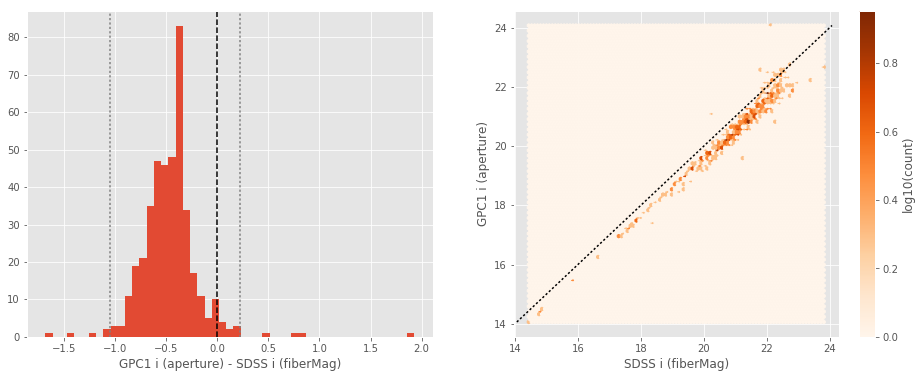

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.46
- Median Absolute Deviation: 0.13
- 1% percentile: -1.05235595703125
- 99% percentile: 0.22046985626220675


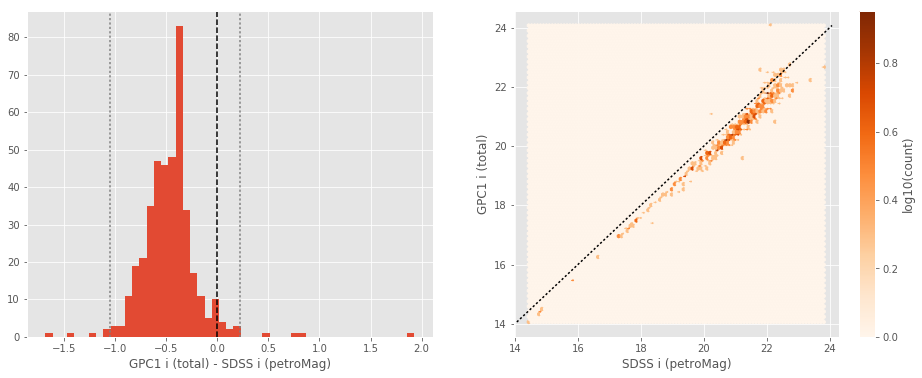

No sources have both SDSS z (fiberMag) and DECam z (aperture) values.
No sources have both SDSS z (petroMag) and DECam z (total) values.
SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.20
- 1% percentile: -1.4851822090148925
- 99% percentile: 1.1405510902404734


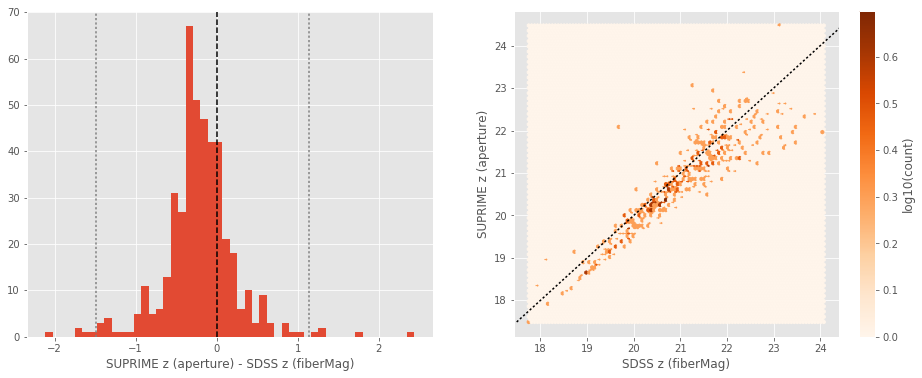

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.22
- Median Absolute Deviation: 0.20
- 1% percentile: -1.4851822090148925
- 99% percentile: 1.1405510902404734


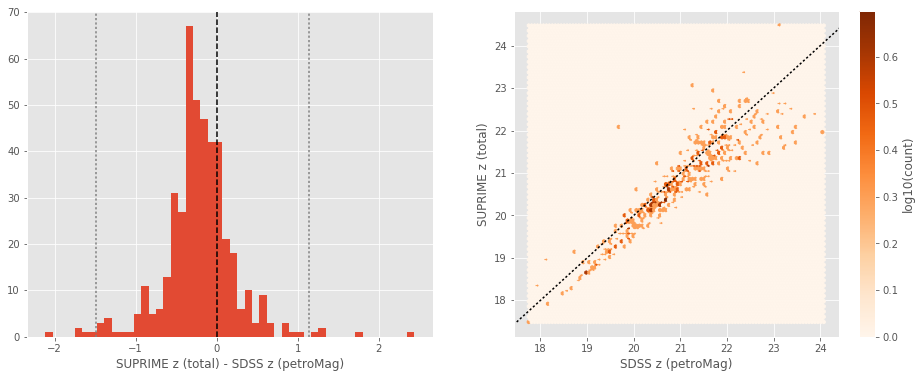

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.17
- 1% percentile: -1.6373119163513183
- 99% percentile: 0.8632956314086894


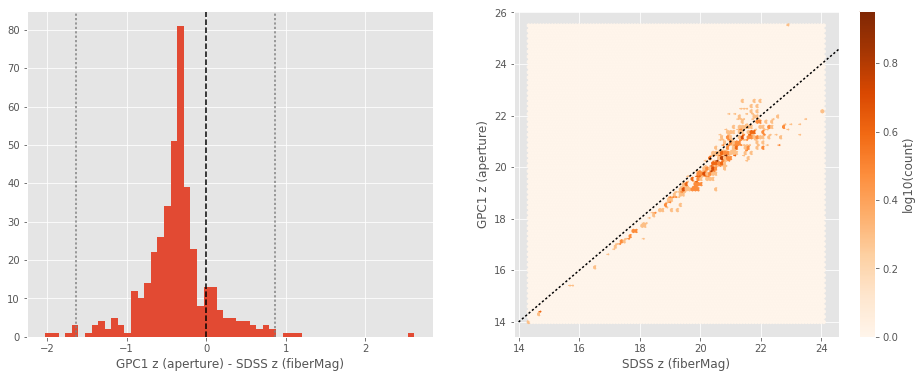

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.17
- 1% percentile: -1.6373119163513183
- 99% percentile: 0.8632956314086894


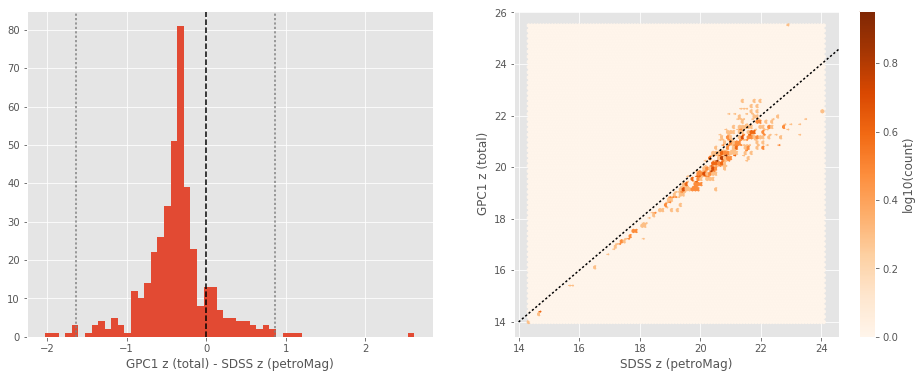

In [26]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-15.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

No sources have both 2MASS J and UKIDSS J (total) values.


In [16]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

No sources have both 2MASS Ks and UKIDSS Ks-like (total) values.


VISTA J (total) - 2MASS J:
- Median: -0.86
- Median Absolute Deviation: 0.03
- 1% percentile: -1.4735743736173468
- 99% percentile: -0.7421620307828747


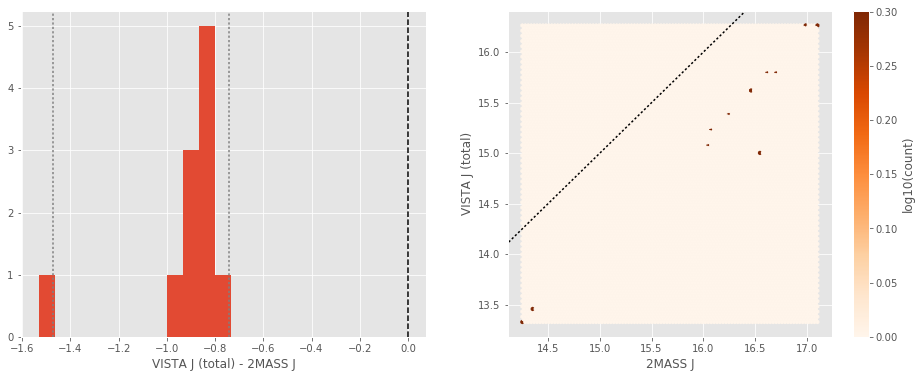

In [18]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vircam_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

In [19]:
ukidss_ks_like = master_catalogue['m_vircam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "VIRCAM Ks (total)"))

No sources have both 2MASS Ks and VIRCAM Ks (total) values.


## IV - Comparing aperture magnitudes to total ones.

Number of source used: 12558 / 15646 (80.26%)


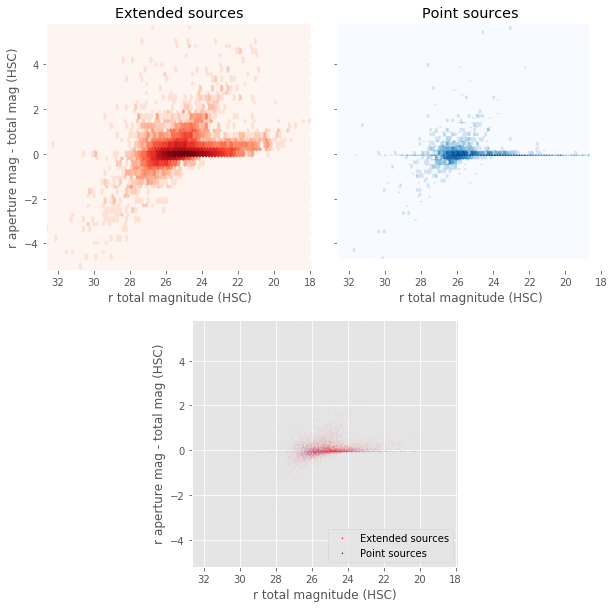

In [20]:
nb_ccplots(
    master_catalogue['m_suprime_r'],
    master_catalogue['m_ap_suprime_r'] - master_catalogue['m_suprime_r'],
    "r total magnitude (HSC)", "r aperture mag - total mag (HSC)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 15646 (0.00%)
HELP warning: no sources with observations in both bands


In [22]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_vircam_j'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_vircam_k'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

KeyError: 'm_vista_j'

In [23]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 15646 (0.00%)
HELP warning: no sources with observations in both bands


Number of source used: 14 / 15646 (0.09%)


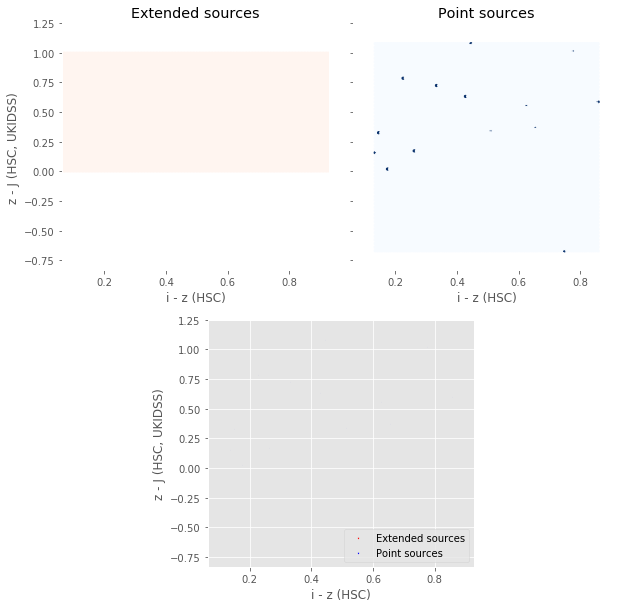

In [24]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_suprime_z'],
    master_catalogue['m_suprime_z'] - master_catalogue['m_ukidss_j'],
    "i - z (HSC)", "z - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)